# The Sparks Foundation
###   By Aishwarya Jaiswal
Aim - Predict the percentage of an student based on the no. of study hours.


**Importing** **Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics  

**Loading** **Dataset**

In [2]:
dataset = pd.read_csv(r'http://bit.ly/w-data')

**Exploring** **Dataset**

In [3]:
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


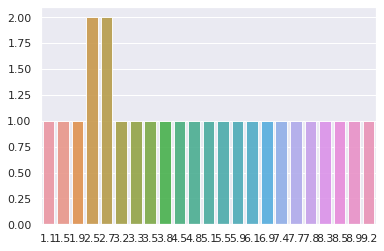

In [6]:
carrier_count = dataset['Hours'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.show() 

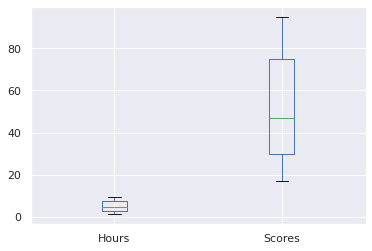

In [7]:
dataset.plot.box() 

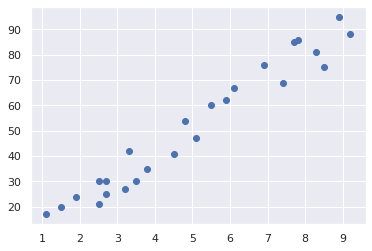

In [9]:
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values  
plt.scatter(X,y)

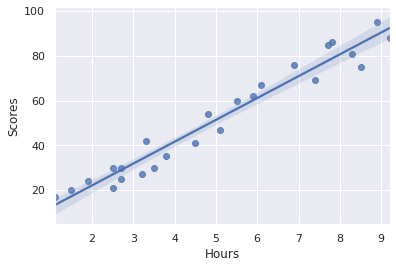

In [11]:
sns.regplot(x="Hours", y="Scores", data=dataset);

**Spliting** **Train** **/Test Data**

In [12]:
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values  

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0) 

**Linear Regression**


In [14]:
StudentScoreModel=LinearRegression()
StudentScoreModel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print("Test Score : ",StudentScoreModel.score(X_test, y_test))
print("Train Score : ",StudentScoreModel.score(X_train,y_train))

Test Score :  0.9454906892105354
Train Score :  0.9515510725211553


**Plotting Regression Line**

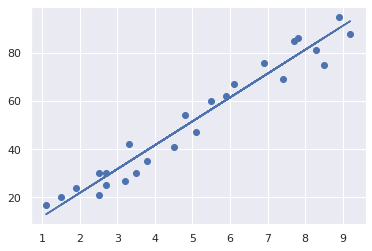

In [16]:
line = StudentScoreModel.coef_*X+StudentScoreModel.intercept_

plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [17]:
print("Coefficient : ", StudentScoreModel.coef_)

Coefficient :  [9.91065648]


In [18]:
print("Intercept : ",StudentScoreModel.intercept_)

Intercept :  2.018160041434662


**Predictions**

In [19]:
y_pred=StudentScoreModel.predict(X_test)
print("Y predictions : ",y_pred)
print("Y test : ",y_test)

Y predictions :  [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]
Y test :  [20 27 69 30 62]


In [20]:
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred)) 

Mean Square Error: 21.598769307217456


**Prediction at Hours=9.25**

In [21]:
Hours = 9.25
Pred=StudentScoreModel.coef_*Hours+StudentScoreModel.intercept_
print("Predicted Score at 9.25 Hours = {}".format(Pred))

Predicted Score at 9.25 Hours = [93.69173249]
